In [1]:
from google.colab import files
uploaded = files.upload()

Saving santa.zip to santa.zip


In [2]:
import zipfile
import os

for file in uploaded.keys():
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('dataset')

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import random
import os

train_path = 'dataset/is that santa/train'
test_path = 'dataset/is that santa/test'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 492 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
Found 616 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,563,970 (36.48 MB)

 Trainable params: 9,563,970 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_generator, epochs=20, validation_data=test_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.5168 - loss: 1.2790 - val_accuracy: 0.5130 - val_loss: 0.6697
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.5779 - loss: 0.6630 - val_accuracy: 0.6591 - val_loss: 0.5547
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.8172 - loss: 0.4400 - val_accuracy: 0.8718 - val_loss: 0.3257
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9076 - loss: 0.3746 - val_accuracy: 0.8961 - val_loss: 0.2587
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8848 - loss: 0.2604 - val_accuracy: 0.8961 - val_loss: 0.2401
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8898 - loss: 0.2926 - val_accuracy: 0.8977 - val_loss: 0.2640
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9086 - loss: 0.2393 - val_accuracy: 0.8685 - val_loss: 0.3782
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.8932 - loss: 0.2575 - val_accuracy: 0.7971 - val_loss:

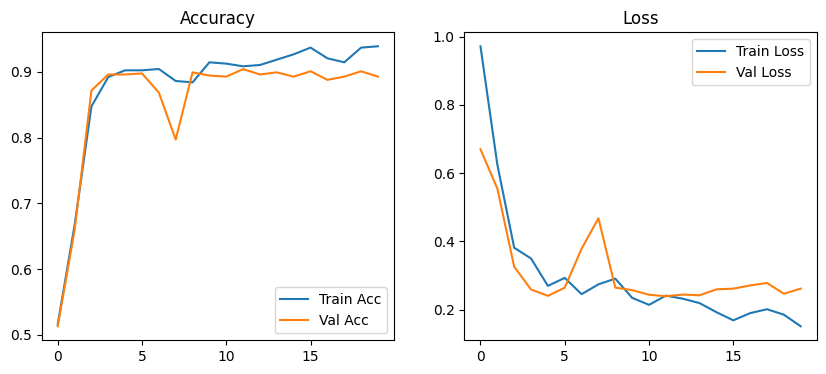

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc:.2f}")
print(f"✅ Test Loss: {test_loss:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 634ms/step - accuracy: 0.8567 - loss: 0.3235
✅ Test Accuracy: 0.89
✅ Test Loss: 0.26


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


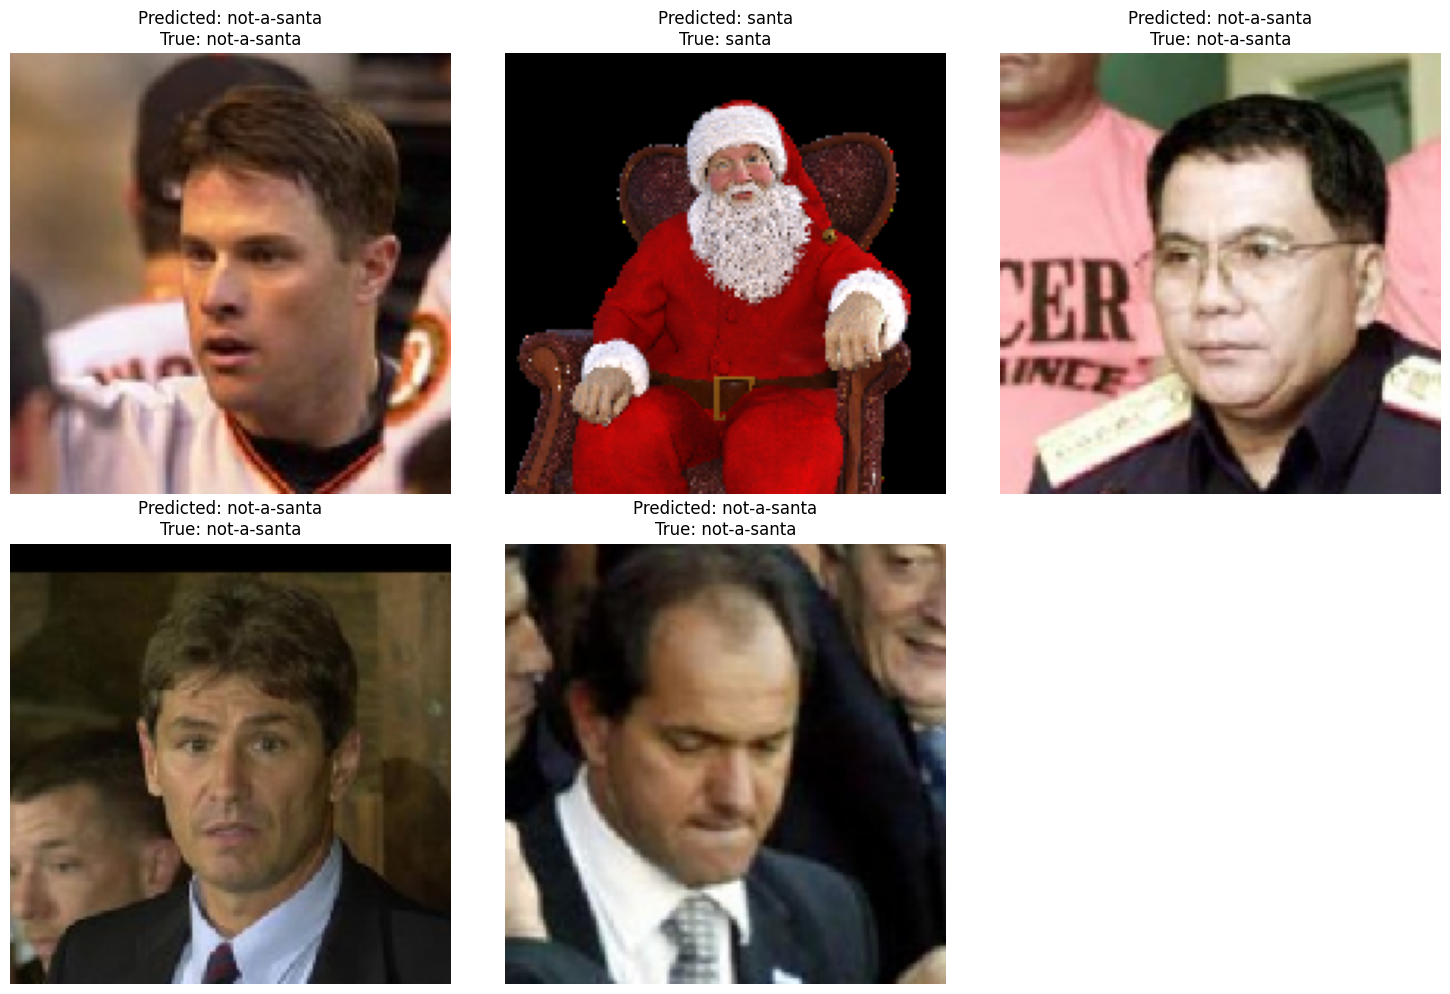

In [11]:
from tensorflow.keras.utils import load_img, img_to_array

class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(15, 10))  # กำหนดขนาดภาพรวม
for i in range(5):
    sample_folder = random.choice(class_names)
    sample_path = f"{test_path}/{sample_folder}"
    sample_image = random.choice(os.listdir(sample_path))

    img_path = f"{sample_path}/{sample_image}"
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    pred_class = class_names[np.argmax(pred)]

    # แสดงภาพ + คำทำนาย
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {pred_class}\nTrue: {sample_folder}")

plt.tight_layout()
plt.show()

In [12]:
model.save('santa_model.h5')
from google.colab import files
files.download('santa_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>